인공신경망 - Neuron의 동작 방식 - 신호 전달

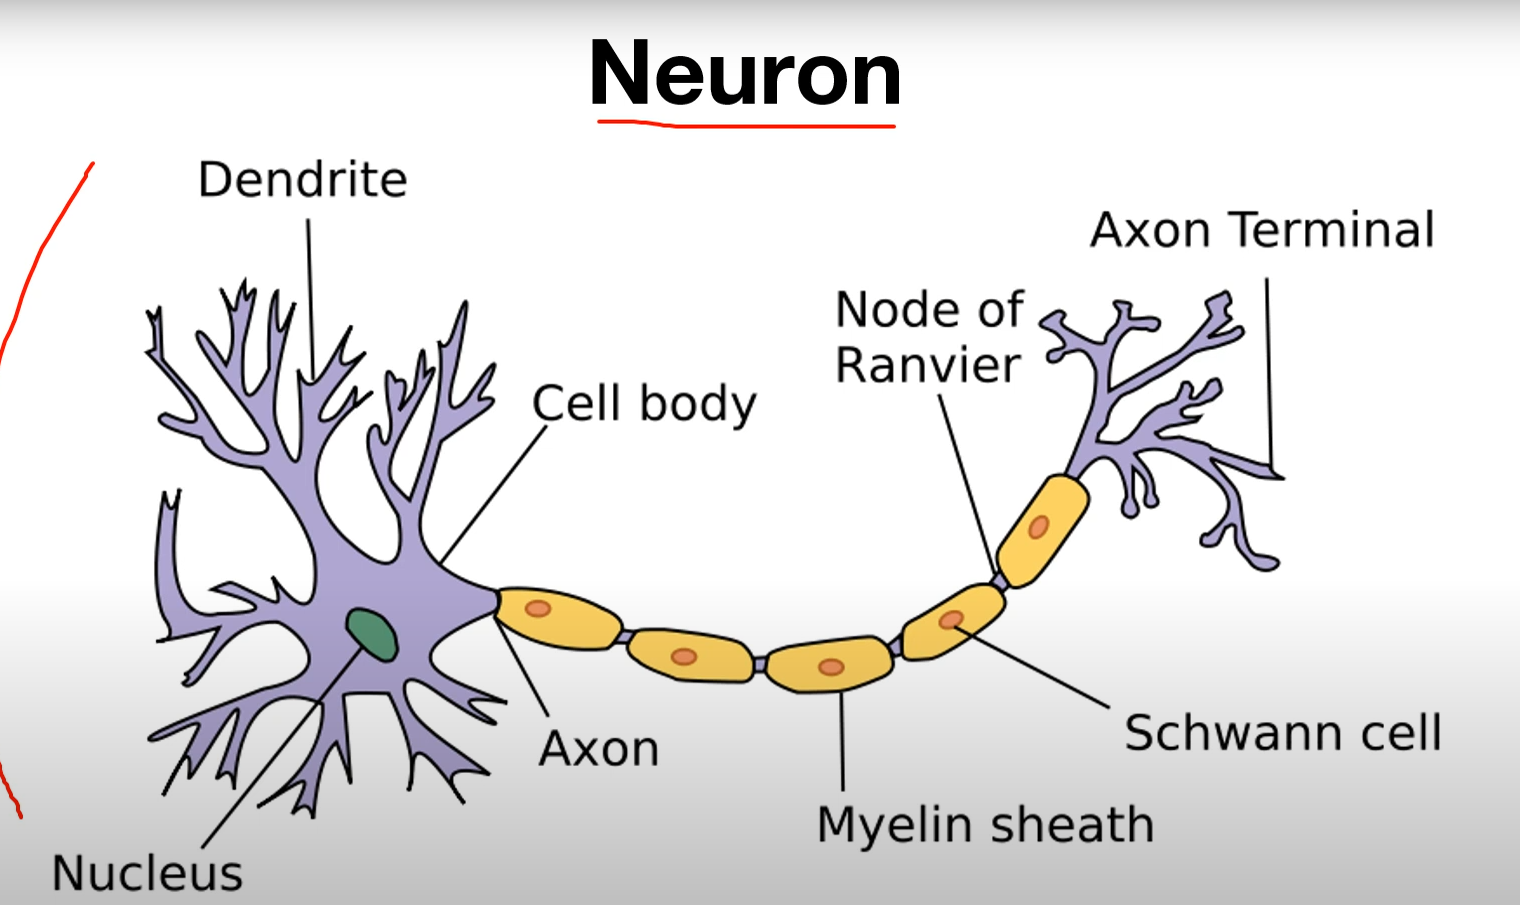

Perceptron- linear classifier linear하게 분류하는것
=> AND, OR
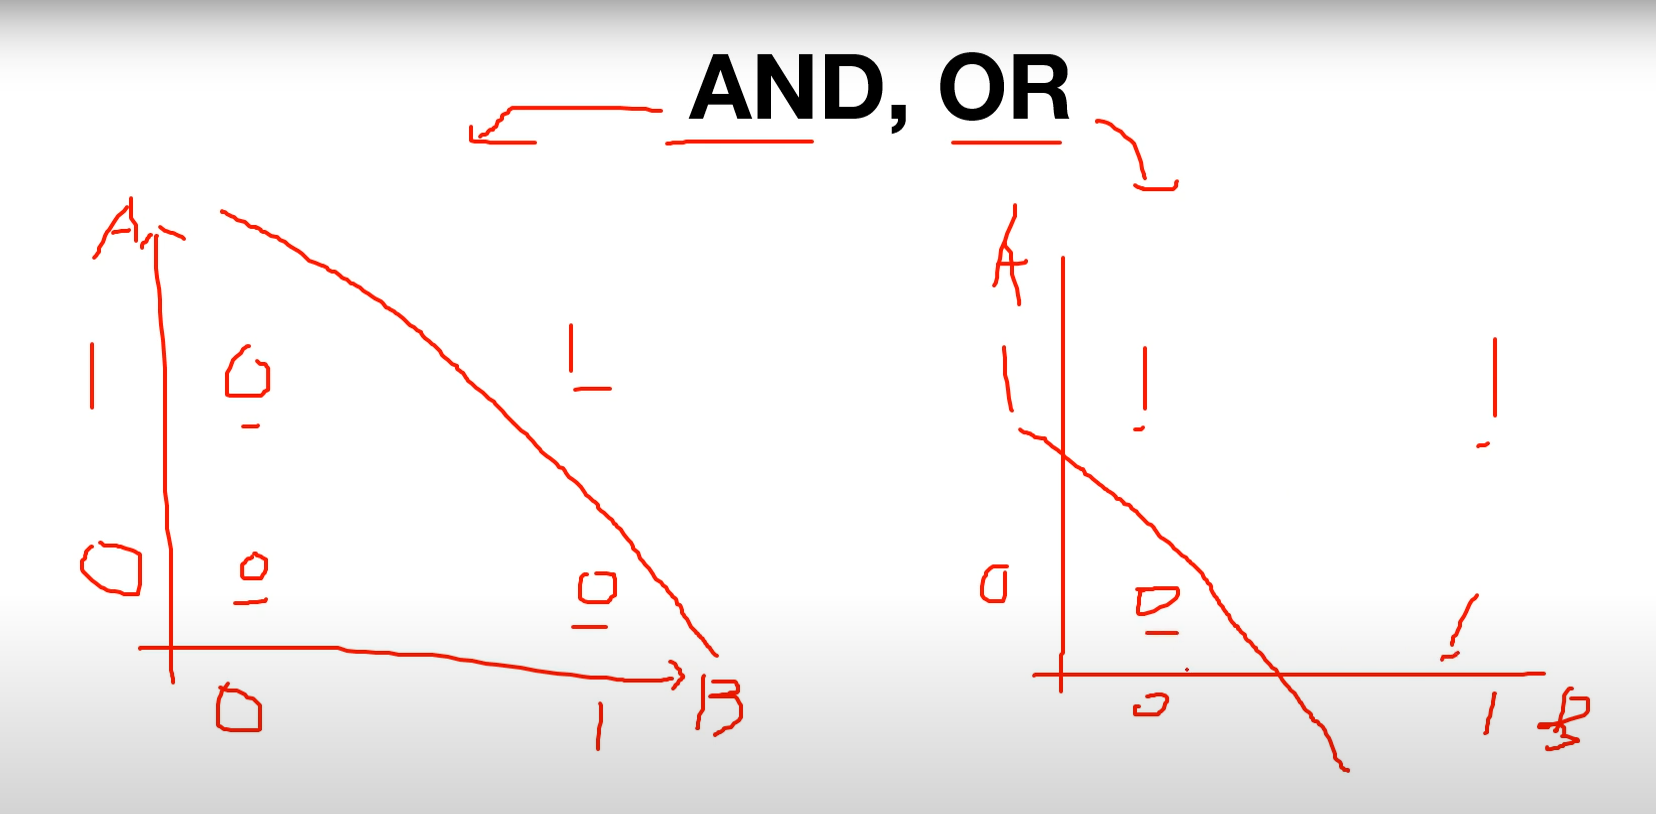

XOR: multilayer를 쌓아야지만 XOR를 풀수있다. But multilayer를 학습할 방법이 없다. perceptron으로 안됨


In [1]:
# Lab 9 XOR
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
# nn layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [5]:
# model
model = torch.nn.Sequential(linear, sigmoid).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device) #Binary Cross Entropy 0,1을 분류하는 것이기 때문에
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [8]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200번째 이후로부터는 loss가 거의 줄어들지를 않는데. 모든 값을 0.5, 정확도가 0.5에서 향상이 되지 않는다

In [9]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()
  if step % 100 == 0:
    print(step, cost.item())

0 0.7666423320770264
100 0.6931473612785339
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [10]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5
